In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html

In [11]:
df = pd.read_csv('./data/norphlet_subset_scaled_clustered_additional_features_20200610.csv', encoding='utf8',
                dtype={'wellname': str, 'field': str,  'field_part': str, 'filename' : str,
                       'wellname_old': str, 'dataset_name': str, 'depth_range': str})

In [17]:
df = df[[c for c in df.columns if 'Unnamed' not in c]]
df.head()

,wellname,field,field_part,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,filename,wellname_old,dataset_name,rmedium_ohm_m,rshallow_ohm_m,dt,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,spectral4,spectral5,spectral6,spectral7,spectral8,denoised4,denoised5,denoised6,denoised7,denoised8,em4,em5,em6,em7,em8,dbscan,depth_range,depth_bin,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_has_duplicate_max,density_g_cm3_has_duplicate_min,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_has_duplicate_max,rdeep_ohm_m_has_duplicate_min,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_has_duplicate_max,gr_gapi_has_duplicate_min,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_has_duplicate_max,neutron_cfcf_has_duplicate_min,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_de

In [20]:
print(df.shape)
df.describe()

(14273, 271)


,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,rmedium_ohm_m,rshallow_ohm_m,dt,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,spectral4,spectral5,spectral6,spectral7,spectral8,denoised4,denoised5,denoised6,denoised7,denoised8,em4,em5,em6,em7,em8,dbscan,depth_bin,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_derivative_central,neutron_cfcf_percentage_of_reoccurring_datapoints_to_all_datapoints,neutron_cfcf_ratio_beyond_r_sigma,neutron_cfcf_ratio_value_number_to_time_series_length,neutron_cfcf_sample_entropy,neutron_cfcf_skewness,neutron_cfcf_standard_deviation,neutron_cfcf_sum_of_reoccurring_data_points,neutron_cfcf

In [21]:
original_and_clustering_cols = ['wellname', 'field', 'field_part', 'md_ft', 'density_g_cm3', 'dtc_us_ft', 'dts_us_ft', 'fluid',
                                'gr_gapi', 'neutron_cfcf', 'nmr_bw_vv', 'nmr_cbw_vv', 'nmr_ff_vv', 'nmr_tpor_vv', 'rdeep_ohm_m',
                                'tvd_ft', 'tvdbml_ft', 'tvdss_ft', 'filename', 'wellname_old', 'dataset_name', 'rmedium_ohm_m',
                                'rshallow_ohm_m', 'dt', 'kmeans4', 'kmeans5', 'kmeans6', 'kmeans7', 'kmeans8', 'spectral4',
                                'spectral5', 'spectral6', 'spectral7', 'spectral8', 'denoised4', 'denoised5', 'denoised6',
                                'denoised7','denoised8','em4','em5','em6','em7','em8','dbscan','depth_range','depth_bin']

new_cols = [c for c in df.columns if c not in original_and_clustering_cols]
len(new_cols)

224

In [22]:
df.isna().sum()

wellname                                                                    0
field                                                                       0
field_part                                                               7027
md_ft                                                                       0
density_g_cm3                                                               0
dtc_us_ft                                                                   0
dts_us_ft                                                                   0
fluid                                                                       0
gr_gapi                                                                     0
neutron_cfcf                                                                0
nmr_bw_vv                                                                   0
nmr_cbw_vv                                                                  0
nmr_ff_vv                                                       

In [23]:
# row 12098 is reponsible for many single NaNs
df[df['nmr_ff_vv_mean_change'].isna()]

,wellname,field,field_part,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,filename,wellname_old,dataset_name,rmedium_ohm_m,rshallow_ohm_m,dt,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,spectral4,spectral5,spectral6,spectral7,spectral8,denoised4,denoised5,denoised6,denoised7,denoised8,em4,em5,em6,em7,em8,dbscan,depth_range,depth_bin,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_has_duplicate_max,density_g_cm3_has_duplicate_min,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_has_duplicate_max,rdeep_ohm_m_has_duplicate_min,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_has_duplicate_max,gr_gapi_has_duplicate_min,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_has_duplicate_max,neutron_cfcf_has_duplicate_min,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_de

In [26]:
# 4 rows (12098, 14075, 14076, 14077) are responsible for all NaNs in 'kurtosis' columns
df[df['dt_kurtosis'].isna()]

,wellname,field,field_part,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,filename,wellname_old,dataset_name,rmedium_ohm_m,rshallow_ohm_m,dt,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,spectral4,spectral5,spectral6,spectral7,spectral8,denoised4,denoised5,denoised6,denoised7,denoised8,em4,em5,em6,em7,em8,dbscan,depth_range,depth_bin,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_has_duplicate_max,density_g_cm3_has_duplicate_min,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_has_duplicate_max,rdeep_ohm_m_has_duplicate_min,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_has_duplicate_max,gr_gapi_has_duplicate_min,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_has_duplicate_max,neutron_cfcf_has_duplicate_min,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_de

In [29]:
# NaNs are left only in ~1000 rows for entropy columns
df.drop([12098, 14075, 14076, 14077]).isna().sum()

wellname                                                                    0
field                                                                       0
field_part                                                               7023
md_ft                                                                       0
density_g_cm3                                                               0
dtc_us_ft                                                                   0
dts_us_ft                                                                   0
fluid                                                                       0
gr_gapi                                                                     0
neutron_cfcf                                                                0
nmr_bw_vv                                                                   0
nmr_cbw_vv                                                                  0
nmr_ff_vv                                                       

In [37]:
# which rows have entropy as NaN
df[df['density_g_cm3_sample_entropy'].isna()]

,wellname,field,field_part,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,filename,wellname_old,dataset_name,rmedium_ohm_m,rshallow_ohm_m,dt,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,spectral4,spectral5,spectral6,spectral7,spectral8,denoised4,denoised5,denoised6,denoised7,denoised8,em4,em5,em6,em7,em8,dbscan,depth_range,depth_bin,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_has_duplicate_max,density_g_cm3_has_duplicate_min,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_has_duplicate_max,rdeep_ohm_m_has_duplicate_min,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_has_duplicate_max,gr_gapi_has_duplicate_min,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_has_duplicate_max,neutron_cfcf_has_duplicate_min,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_de

In [42]:
# do they correspond to one well? Yes!
df[df.wellname == 'MC612-1BP1'].index

Int64Index([12098, 12099, 12100, 12101, 12102, 12103, 12104, 12105, 12106,
            12107,
            ...
            14263, 14264, 14265, 14266, 14267, 14268, 14269, 14270, 14271,
            14272],
           dtype='int64', length=2175)

In [48]:
entropy_cols = [c for c in df.columns if 'entropy' in c]
entropy_cols

['density_g_cm3_sample_entropy',
 'rdeep_ohm_m_sample_entropy',
 'gr_gapi_sample_entropy',
 'neutron_cfcf_sample_entropy',
 'nmr_ff_vv_sample_entropy',
 'nmr_tpor_vv_sample_entropy',
 'dt_sample_entropy']

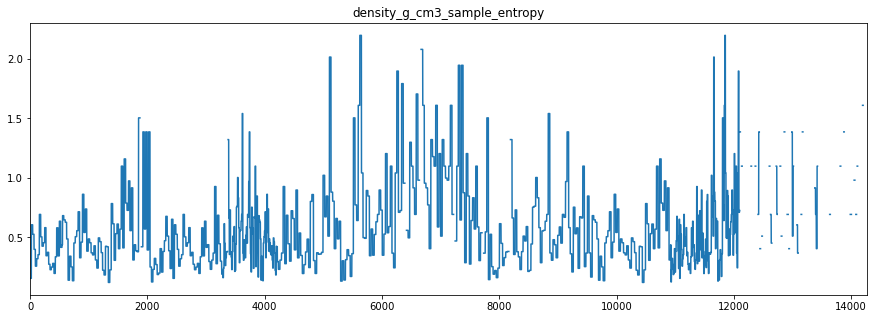

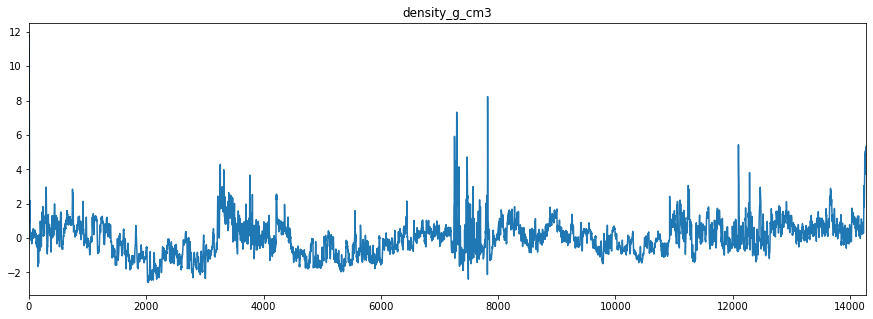

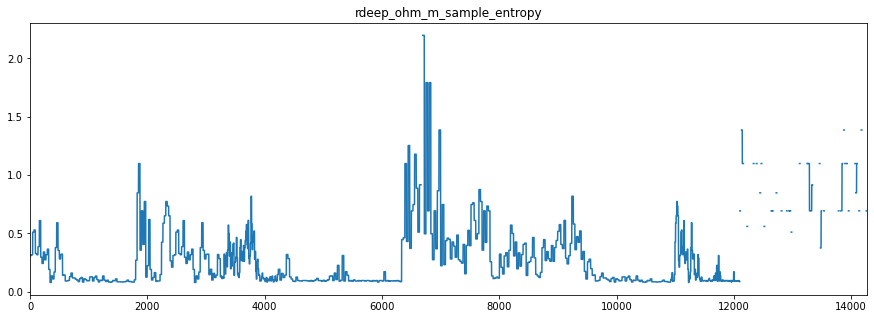

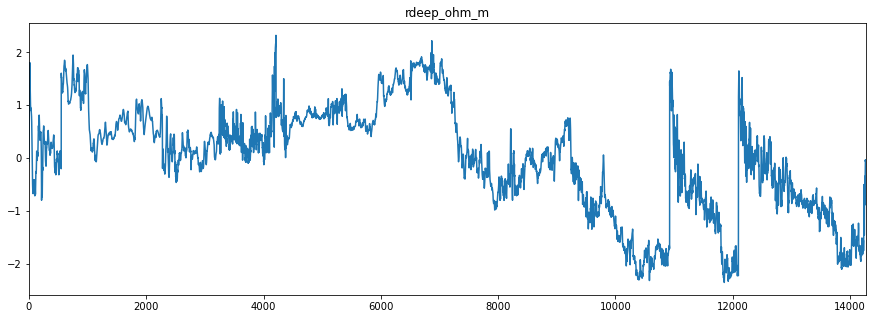

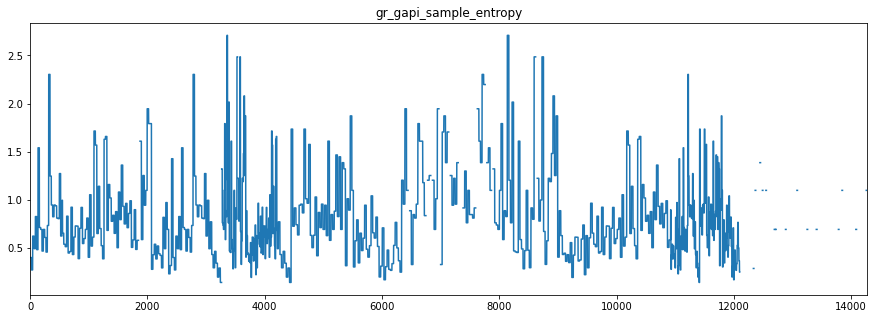

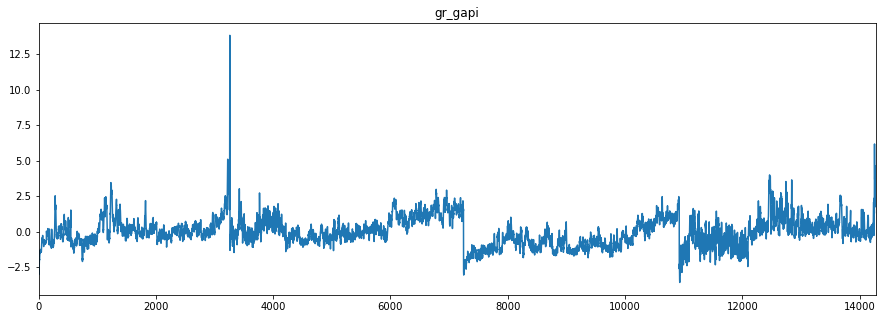

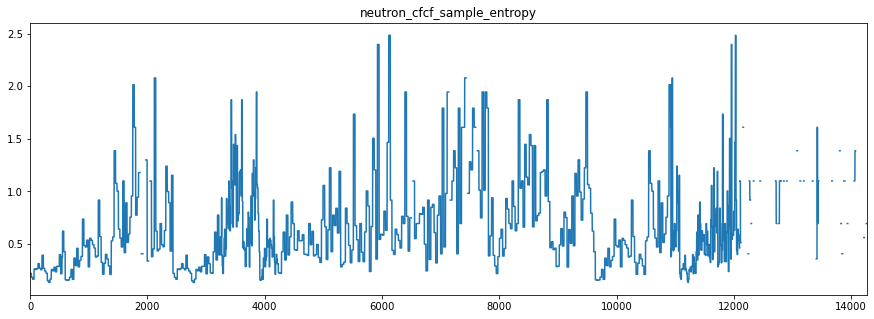

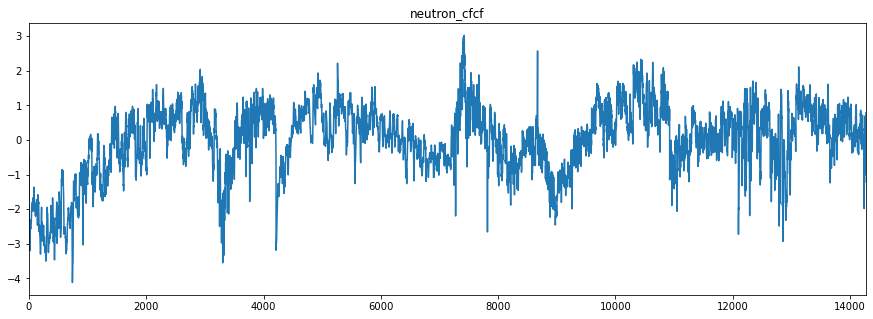

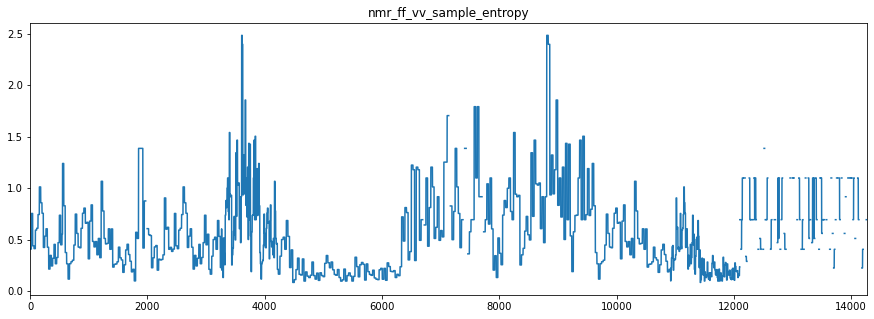

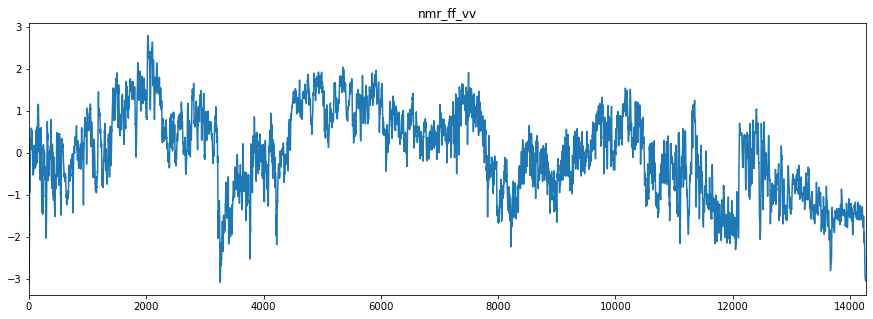

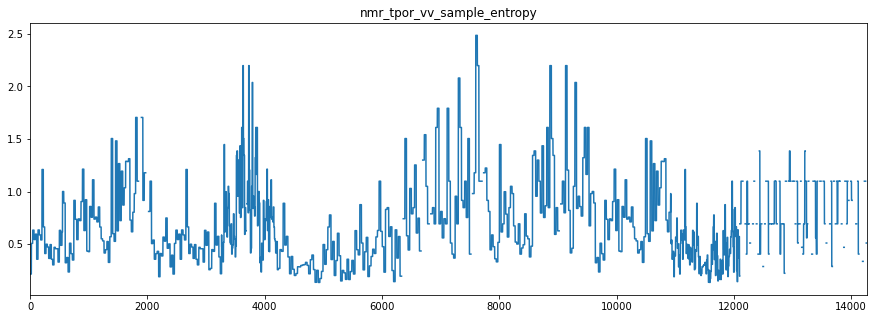

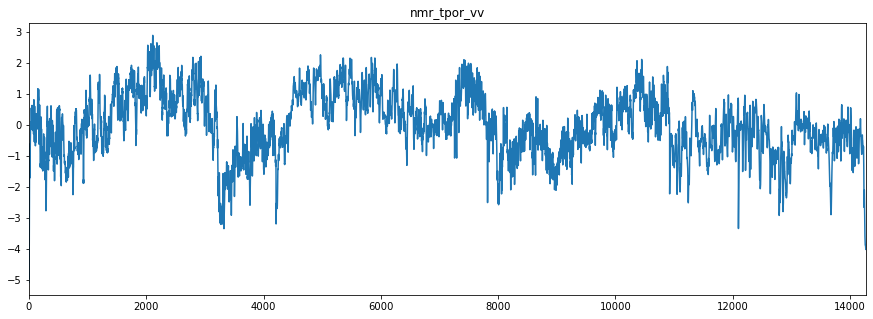

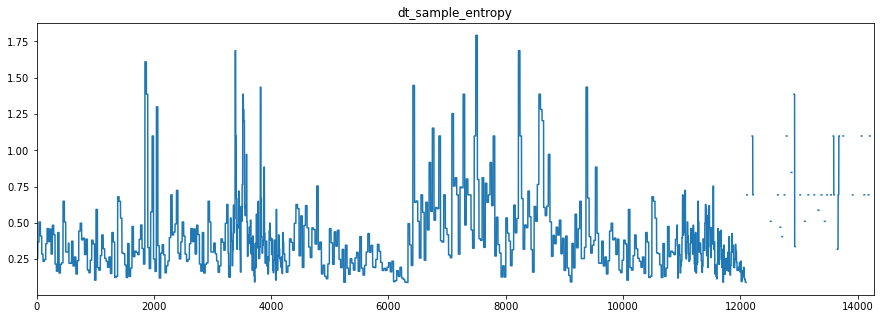

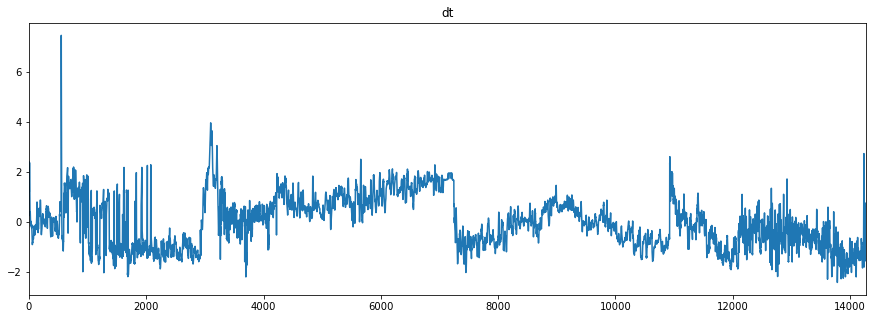

In [47]:
for c in entropy_cols:
    df[c].plot(figsize=(15,5), title=c)
    plt.show()
    temp = c.replace('_sample_entropy', '')
    df[temp].plot(figsize=(15,5), title=temp)
    plt.show()

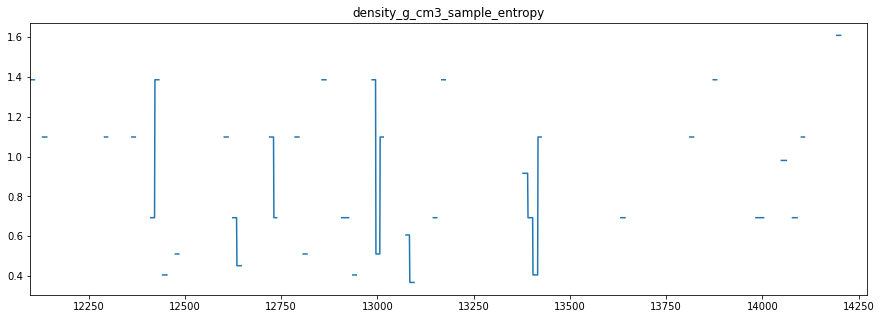

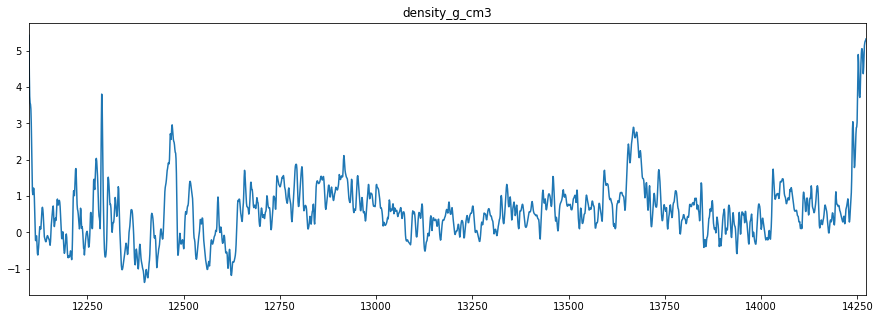

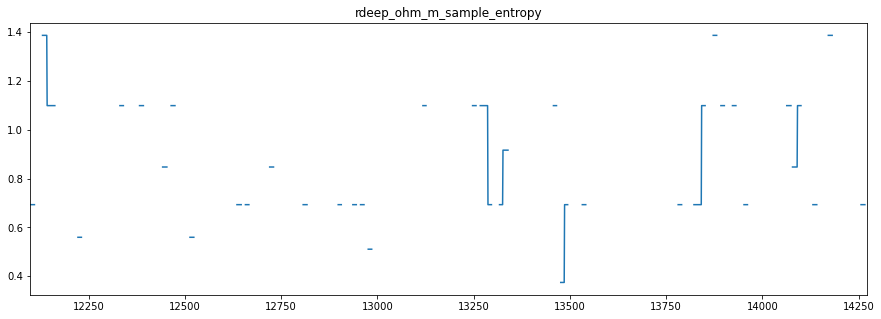

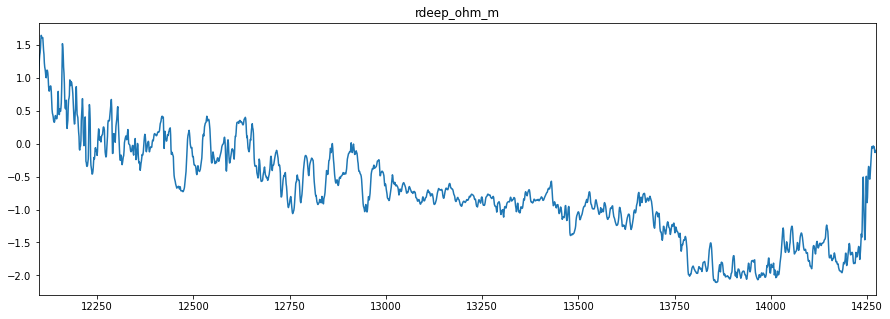

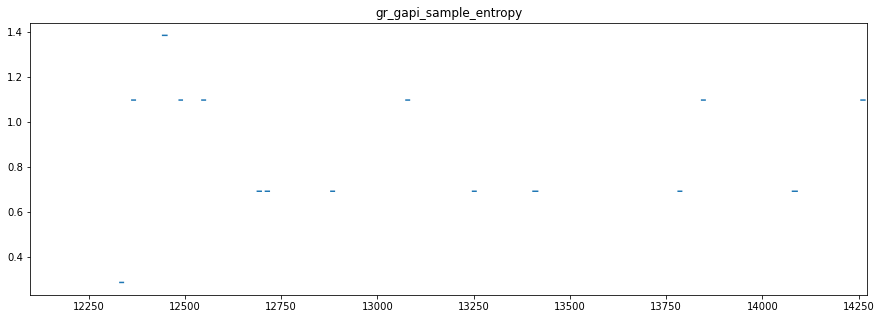

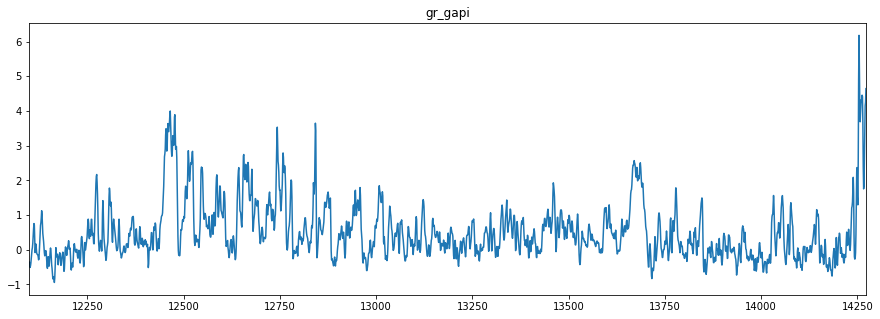

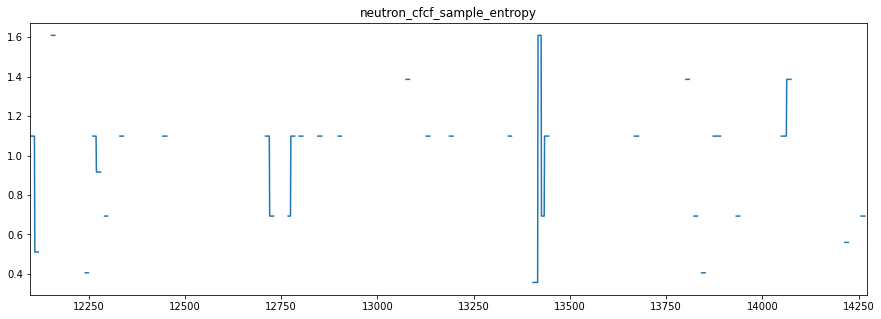

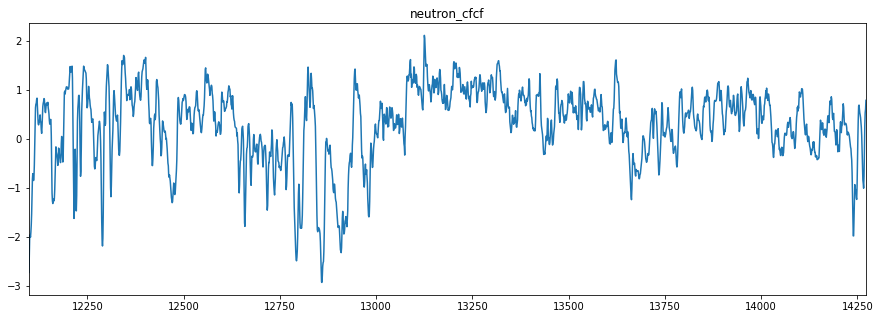

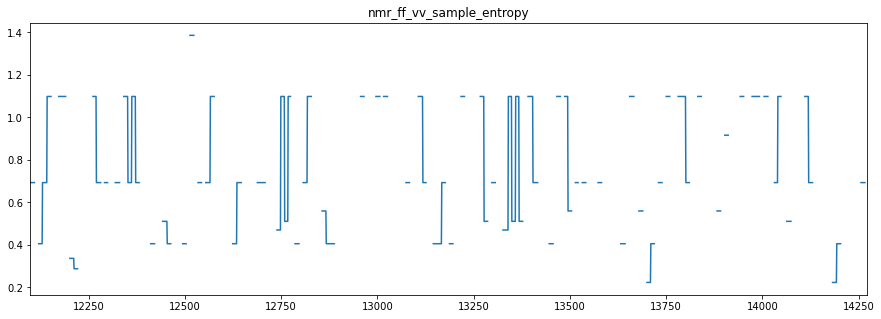

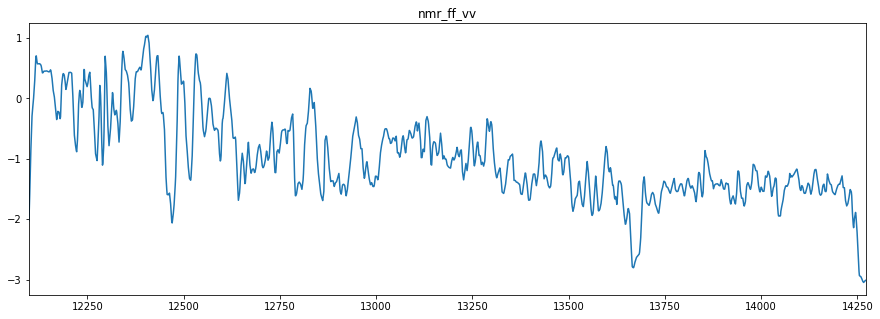

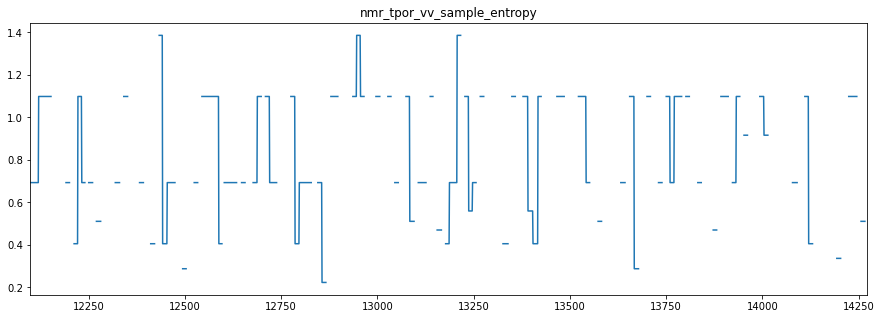

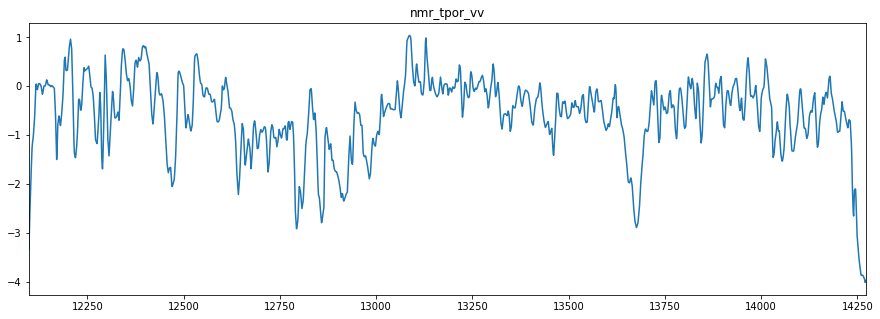

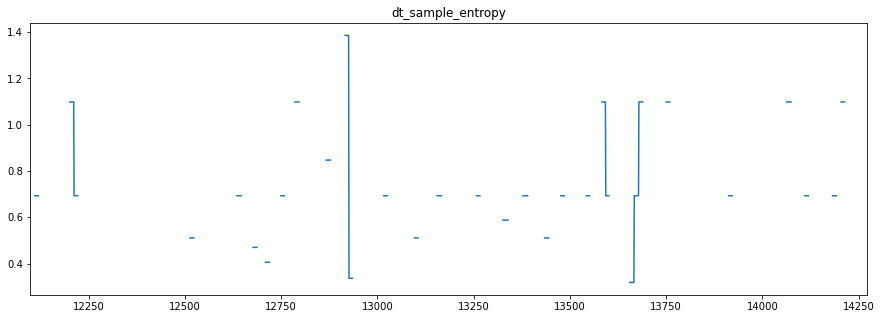

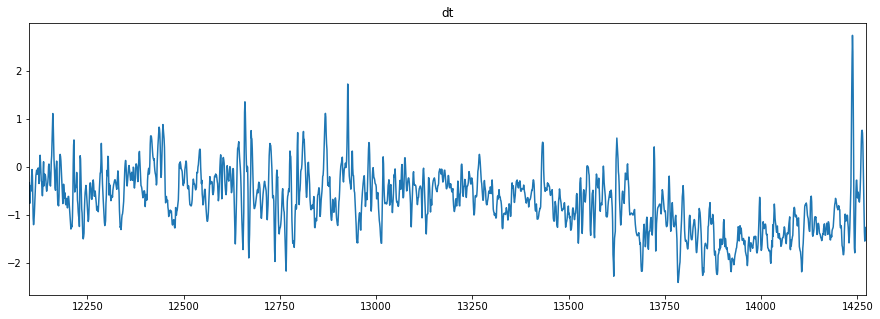

In [49]:
for c in entropy_cols:
    df[df.wellname == 'MC612-1BP1'][c].plot(figsize=(15,5), title=c)
    plt.show()
    temp = c.replace('_sample_entropy', '')
    df[df.wellname == 'MC612-1BP1'][temp].plot(figsize=(15,5), title=temp)
    plt.show()

In [ ]:
# set of histograms
dataset_df[features_all + ['target']].hist(figsize=(15, 15))

In [ ]:
# box plots
for feature in features_select:
    fig, ax =plt.subplots(1,2, figsize=(20,5))
    sns.boxplot(x=dataset_df[feature], ax=ax[0]).set_title('Real Data')
    #sns.swarmplot(x=dataset_df[feature], ax=ax[0], color=".25")
    sns.boxplot(x=df_bc[feature], ax=ax[1]).set_title('Behavior Cloning')
    #sns.swarmplot(x=df_bc[feature], ax=ax[1], color=".25")
    fig.show()

In [ ]:
dfs = [dataset_df, df_bc]
titles = ['Real Data', 'Behavior Cloning']
for col in features_select:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    for idx, ax in enumerate(axs):    
        ax.scatter(dfs[idx][col], dfs[idx].index)
        ax.set_title(titles[idx])
        ax.set_xlabel(col)
        ax.set_ylabel('Fields')
    plt.tight_layout()